# Compute health expenditures per income level

In [301]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats 
from importlib import reload
import pandas as pd
import pickle
import os
import sys
from statsmodels.formula.api import ols,wls
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)


In [302]:
from model import micro,macro, params
from model import distributions as dist

# Simulated Gradient

In [303]:

file = open('output/eq_pus_ge3.pkl','rb')
eq = pickle.load(file)
file.close()
opt = pd.read_pickle('output/opt_pus_ge3.pkl')

In [304]:
def wmean(x,var):
    xx = x.loc[~x[var].isna(),:]
    names = {var: (xx[var] * xx['ps']).sum()/xx['ps'].sum()} 
    return pd.Series(names, index=[var])

In [305]:
tab_eh = opt.groupby(['h','e']).apply(wmean,var='m').unstack()
tab_eh

m                                                                 \
e         0             1        2         3        4          5         6   
h                                                                            
0  0.525576  7.810403e-01  1.29577  2.689467  7.29176  13.616625  16.92276   
1  0.000000  5.656805e-18  0.00000  0.000000  0.00000   0.000000   0.00000   

                                       
e          7             8          9  
h                                      
0  18.823232  2.058494e+01  22.230655  
1   0.000000  4.268590e-14   0.019326

In [306]:
tab_h = opt.groupby('e').apply(wmean,var='h').unstack()
tab_h

   e
h  0    0.677376
   1    0.719265
   2    0.778303
   3    0.846530
   4    0.910622
   5    0.949463
   6    0.962733
   7    0.965976
   8    0.967188
   9    0.967949
dtype: float64

In [307]:
grad_m_sim = opt.groupby('e').apply(wmean,var='m')
grad_m_sim

,m
e,
0,0.169564
1,0.219266
2,0.287269
3,0.412752
4,0.651721
5,0.688138
6,0.630657
7,0.640445
8,0.675423


In [308]:
grad_m_sim['m'] = grad_m_sim['m']/grad_m_sim.loc[4,'m']-1
grad_m_sim.index = [x for x in range(1,11)]
grad_m_sim

,m
1,-0.739822
2,-0.663559
3,-0.559215
4,-0.366673
5,0.000000
6,0.055878
7,-0.032321
8,-0.017302
9,0.036369
10,0.121999


# Data

In [309]:
df = pd.read_stata('../data_sources/meps/MEPS0004_agghealth.dta', convert_categoricals=False)
df.head()

,duid,dupersid,famidyr,famszeyr,famrfpyr,region53,age,racex,hispan,marry53x,...,nh_diabe,nh_lunge,nh_cancre,smokev,nh_smoken,mergeMEPSNHIS,smoken,totinc,inscov,_merge
0,20002.0,20002014,A,6.0,1.0,4.0,39.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,0.0,30000.0,1.0,3
1,20002.0,20002014,A,6.0,1.0,4.0,40.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,0.0,25200.0,1.0,3
2,20002.0,20002021,A,6.0,0.0,4.0,16.0,1.0,1.0,5.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,3.0,3
3,20002.0,20002021,A,6.0,0.0,4.0,17.0,1.0,1.0,5.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,3.0,3
4,20002.0,20002038,A,6.0,0.0,4.0,14.0,1.0,1.0,6.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,3.0,3


In [310]:
df.columns.to_list()

['duid',
 'dupersid',
 'famidyr',
 'famszeyr',
 'famrfpyr',
 'region53',
 'age',
 'racex',
 'hispan',
 'marry53x',
 'educyear',
 'totded04',
 'rthlth53',
 'mnhlth53',
 'iadlhp53',
 'adlhlp53',
 'bmindx53',
 'diabdx53',
 'asthdx53',
 'hibpdx53',
 'chddx53',
 'angidx53',
 'midx53',
 'ohrtdx53',
 'strkdx53',
 'emphdx53',
 'adsmok42',
 'tottch04',
 'totexp',
 'totslf',
 'totmcr',
 'totmcd',
 'totprv',
 'totva',
 'tottri04',
 'totofd',
 'totstl04',
 'totwcp',
 'totopr',
 'totopu',
 'totosr',
 'doctim',
 'hsptim',
 'hspnit',
 'perwt',
 'famwt',
 'male',
 'mepsexp',
 'mepsslf',
 'mepsmcr',
 'mepsmcd',
 'mepsprv',
 'mepsva',
 'mepsofd',
 'mepswcp',
 'mepsopr',
 'mepsopu',
 'mepsosr',
 'yr',
 'totded03',
 'tottch03',
 'tottri03',
 'totstl03',
 'totded02',
 'tottch02',
 'tottri02',
 'totstl02',
 'totded01',
 'tottch01',
 'tottri01',
 'totstl01',
 'totded00',
 'tottch00',
 'tottri00',
 'totstl00',
 'cccodex',
 'ncccodex',
 'diabecr',
 'hibpecr',
 'strokecr',
 'heartecr',
 'lungecr',
 'cancrecr',


In [311]:
#df = df[df['yr']==2005]

In [312]:
df = df[(df.age>=25)&(df.age<=84)]
df = df[df.totinc>10e3]
df = df[~df.mepsexp.isna()]

In [313]:
data = df[['totinc','age','mepsexp','totmcd','yr','male','obese','diabe','hearte','hibpe','stroke','lunge','perwt','smoken','smokev']].dropna(axis=0)

In [314]:
data['loginc'] = np.log(data['totinc'])
data['m'] = data['mepsexp'] 
#- data['totmcd']
#0.1*data['m'].mean()
data['logm'] = np.log(1.0 + data['m'])

In [315]:
model = wls('loginc ~ C(age) + C(yr) ',data=data,var_weights=np.asarray(data['perwt'])).fit()
# + smoken + smokev + obese + diabe + stroke + hibpe + lunge + hearte + male 
data.loc[:,'ey'] = model.resid.to_list()
data.ey = (data.ey - data.ey.mean())/data.ey.std()
data['ey'] = data['ey'].clip(lower=-2.5,upper=2.5)
data['ey10'] = pd.cut(data['ey'],bins=10,labels=[x for x in range(1,11)])

In [316]:
for q in range(1,11):
	data['ey10_'+str(q)] = np.where(data['ey10']==q,1,0)

In [317]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
totinc,29933.0,37520.579895,27981.120852,10001.000000,18953.000000,29844.000000,46700.000000,437861.000000
age,29933.0,48.554672,15.258306,25.000000,36.000000,46.000000,59.000000,84.000000
mepsexp,29933.0,3847.759766,9466.626953,0.000000,280.738403,1241.407837,3763.529785,459131.875000
totmcd,29933.0,198.690809,2192.007250,0.000000,0.000000,0.000000,0.000000,125102.000000
yr,29933.0,2002.204224,1.350449,2000.000000,2001.000000,2002.000000,2003.000000,2004.000000
male,29933.0,0.467511,0.499003,0.000000,0.000000,0.000000,1.000000,1.000000
obese,29933.0,0.270805,0.444344,0.000000,0.000000,0.000000,1.000000,1.000000
diabe,29933.0,0.072195,0.258840,0.000000,0.000000,0.000000,0.000000,1.000000
hearte,29933.0,0.104834,0.306334,0.000000,0.000000,0.000000,0.000000,1.000000
hibpe,29933.0,0.271273,0.444647,0.000000,0.000000,0.000000,1.000000,1.000000


In [318]:
model = wls('logm ~ ey10_1 +ey10_2 + ey10_3 + ey10_4 + ey10_6 + ey10_7 + ey10_8 + ey10_9 + ey10_10 + C(age) + C(yr) ',data=data,var_weights=np.asarray(data['perwt'])).fit()
#+ smoken + smokev + obese + diabe + stroke + hibpe + lunge + hearte + male
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                   logm   R-squared:                       0.133
Model:                            WLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     63.67
Date:                Wed, 01 Dec 2021   Prob (F-statistic):               0.00
Time:                        08:43:14   Log-Likelihood:                -71127.
No. Observations:               29933   AIC:                         1.424e+05
Df Residuals:                   29860   BIC:                         1.430e+05
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.9943      0.120     41.467      0.000       4.758       5.230
C(age)[T.26.0]      0.0585      0.158      0.371      0.711      -0.251       0.368
C(age)[T.27.0]     -0.0082      0.154     -0.053      0.958      -0.311       0.294
C(age)[T.28.0]      0.0769      0.155      0.497      0.619      -0.227       0.381
C(age)[T.29.0]      0.0626      0.154      0.407      0.684      -0.239       0.364
C(age)[T.30.0]      0.1828      0.151      1.214      0.225      -0.112       0.478
C(age)[T.31.0]      0.3659      0.149      2.457      0.014       0.074       0.658
C(age)[T.32.0]      0.2708      0.147      1.838      0.066      -0.018       0.560
C(age)[T.33.0]      0.4382      0.148      2.969      0.003       0.149       0.727
C(age)[T.34.0]      0.6163      0.150      4.110      0.000       0.322       0.910
C(age)[T.35.0]      0.3755      0.150      2.511      0.012       0.082       0.669
C(age)[T.36.0]      0.4208      0.147      2.871      0.004       0.133       0.708
C(age)[T.37.0]      0.1646      0.146      1.129      0.259      -0.121       0.450
C(age)[T.38.0]      0.4400      0.146      3.016      0.003       0.154       0.726
C(age)[T.39.0]      0.5619      0.145      3.875      0.000       0.278       0.846
C(age)[T.40.0]      0.6895      0.143      4.815      0.000       0.409       0.970
C(age)[T.41.0]      0.6112      0.144      4.238      0.000       0.329       0.894
C(age)[T.42.0]      0.5824      0.147      3.952      0.000       0.294       0.871
C(age)[T.43.0]      0.8199      0.148      5.534      0.000       0.530       1.110
C(age)[T.44.0]      0.8993      0.147      6.133      0.000       0.612       1.187
C(age)[T.45.0]      1.0487      0.147      7.132      0.000       0.761       1.337
C(age)[T.46.0]      1.1097      0.149      7.464      0.000       0.818       1.401
C(age)[T.47.0]      1.2030      0.147      8.202      0.000       0.916       1.490
C(age)[T.48.0]      1.3677      0.150      9.122      0.000       1.074       1.662
C(age)[T.49.0]      1.3892      0.151      9.216      0.000       1.094       1.685
C(age)[T.50.0]      1.4946      0.152      9.831      0.000       1.197       1.793
C(age)[T.51.0]      1.4794      0.152      9.764      0.000       1.182       1.776
C(age)[T.52.0]      1.5778      0.151     10.452      0.000       1.282       1.874
C(age)[T.53.0]      1.6905      0.153     11.024      0.000       1.390       1.991
C(age)[T.54.0]      1.7258      0.152     11.336      0.000       1.427       2.024
C(age)[T.55.0]      1.8769      0.157     11.946      0.000       1.569       2.185
C(age)[T.56.0]      1.7939      0.162     11.083      0.000       1.477       2.111
C(age)[T.57.0]      1.8823      0.162     11.635      0.000       1.565       2.199
C(age)[T.58.0]      2.1418      0.165     12.985      0.000

In [319]:
grad_m_data_se = model.HC0_se[['ey10_'+str(q) for q in range(1,11) if q!=5]]
grad_m_data_se.index = [x for x in range(1,11) if x!=5]
grad_m_data_se[5] = 0
grad_m_data_se = grad_m_data_se.sort_index()
grad_m_data_se

1     0.104976
2     0.067121
3     0.056502
4     0.054155
5     0.000000
6     0.051030
7     0.053827
8     0.059817
9     0.077465
10    0.079016
dtype: float64

In [320]:
grad_m_data = model.params[['ey10_'+str(q) for q in range(1,11) if q!=5]]
grad_m_data.index = [x for x in range(1,11) if x!=5]
grad_m_data[5] = 0
grad_m_data = grad_m_data.sort_index()
grad_m_data

1    -0.417230
2    -0.492526
3    -0.427856
4    -0.322771
5     0.000000
6     0.134237
7     0.193260
8     0.271839
9     0.302418
10    0.205123
dtype: float64

In [321]:
model = wls('logm ~ ey10_1 +ey10_2 + ey10_3 + ey10_4 + ey10_6 + ey10_7 + ey10_8 + ey10_9 + ey10_10 + C(age) + C(yr)  + smoken + smokev + obese + diabe + stroke + hibpe + lunge + hearte + male',data=data,var_weights=np.asarray(data['perwt'])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                   logm   R-squared:                       0.238
Model:                            WLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     115.1
Date:                Wed, 01 Dec 2021   Prob (F-statistic):               0.00
Time:                        08:43:14   Log-Likelihood:                -69195.
No. Observations:               29933   AIC:                         1.386e+05
Df Residuals:                   29851   BIC:                         1.392e+05
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.5782      0.115     48.709      0.000       5.354       5.803
C(age)[T.26.0]      0.0997      0.148      0.674      0.501      -0.190       0.390
C(age)[T.27.0]     -0.0292      0.145     -0.202      0.840      -0.313       0.254
C(age)[T.28.0]      0.0479      0.145      0.329      0.742      -0.237       0.333
C(age)[T.29.0]      0.0762      0.144      0.528      0.597      -0.207       0.359
C(age)[T.30.0]      0.1012      0.141      0.716      0.474      -0.176       0.378
C(age)[T.31.0]      0.3011      0.140      2.156      0.031       0.027       0.575
C(age)[T.32.0]      0.2198      0.138      1.591      0.112      -0.051       0.491
C(age)[T.33.0]      0.4140      0.138      2.991      0.003       0.143       0.685
C(age)[T.34.0]      0.5654      0.141      4.020      0.000       0.290       0.841
C(age)[T.35.0]      0.2953      0.140      2.105      0.035       0.020       0.570
C(age)[T.36.0]      0.3460      0.137      2.516      0.012       0.076       0.615
C(age)[T.37.0]      0.0944      0.137      0.690      0.490      -0.174       0.362
C(age)[T.38.0]      0.3095      0.137      2.262      0.024       0.041       0.578
C(age)[T.39.0]      0.4246      0.136      3.122      0.002       0.158       0.691
C(age)[T.40.0]      0.5074      0.134      3.777      0.000       0.244       0.771
C(age)[T.41.0]      0.4579      0.135      3.385      0.001       0.193       0.723
C(age)[T.42.0]      0.4365      0.138      3.156      0.002       0.165       0.708
C(age)[T.43.0]      0.6452      0.139      4.641      0.000       0.373       0.918
C(age)[T.44.0]      0.6896      0.138      5.011      0.000       0.420       0.959
C(age)[T.45.0]      0.8161      0.138      5.913      0.000       0.546       1.087
C(age)[T.46.0]      0.8266      0.140      5.922      0.000       0.553       1.100
C(age)[T.47.0]      0.9083      0.138      6.595      0.000       0.638       1.178
C(age)[T.48.0]      1.0484      0.141      7.442      0.000       0.772       1.325
C(age)[T.49.0]      1.0245      0.142      7.235      0.000       0.747       1.302
C(age)[T.50.0]      1.0632      0.143      7.441      0.000       0.783       1.343
C(age)[T.51.0]      1.0426      0.142      7.319      0.000       0.763       1.322
C(age)[T.52.0]      1.0361      0.142      7.295      0.000       0.758       1.315
C(age)[T.53.0]      1.1376      0.144      7.886      0.000       0.855       1.420
C(age)[T.54.0]      1.1644      0.143      8.124      0.000       0.883       1.445
C(age)[T.55.0]      1.2512      0.148      8.456      0.000       0.961       1.541
C(age)[T.56.0]      1.2193      0.152      8.001      0.000       0.921       1.518
C(age)[T.57.0]      1.2735      0.152      8.356      0.000       0.975       1.572
C(age)[T.58.0]      1.4763      0.155      9.497      0.000

In [322]:
grad_m_data_h = model.params[['ey10_'+str(q) for q in range(1,11) if q!=5]]
grad_m_data_h.index = [x for x in range(1,11) if x!=5]
grad_m_data_h[5] = 0
grad_m_data_h = grad_m_data_h.sort_index()
grad_m_data_h

1    -0.673487
2    -0.651375
3    -0.513329
4    -0.338845
5     0.000000
6     0.181766
7     0.308457
8     0.423158
9     0.558039
10    0.579012
dtype: float64

In [323]:
table = pd.DataFrame(index=[x for x in range(1,11)],columns=['sim','mean','se'])
table['sim'] = grad_m_sim 
table['mean_h'] = grad_m_data_h
table['mean'] = grad_m_data
table['se'] = grad_m_data_se 

In [324]:
table['up'] = table['mean'] + 1.96*table['se']
table['low'] = table['mean'] - 1.96*table['se']
table

,sim,mean,se,mean_h,up,low
1,-0.739822,-0.417230,0.104976,-0.673487,-0.211477,-0.622983
2,-0.663559,-0.492526,0.067121,-0.651375,-0.360970,-0.624083
3,-0.559215,-0.427856,0.056502,-0.513329,-0.317112,-0.538601
4,-0.366673,-0.322771,0.054155,-0.338845,-0.216627,-0.428916
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.055878,0.134237,0.051030,0.181766,0.234257,0.034218
7,-0.032321,0.193260,0.053827,0.308457,0.298760,0.087759
8,-0.017302,0.271839,0.059817,0.423158,0.389080,0.154597
9,0.036369,0.302418,0.077465,0.558039,0.454250,0.150586
10,0.121999,0.205123,0.079016,0.579012,0.359994,0.050252


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


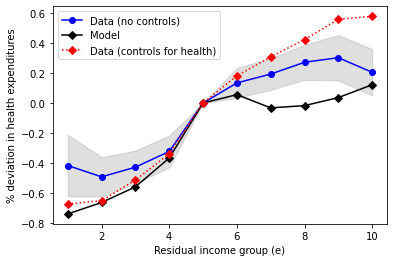

In [325]:
fig, ax = plt.subplots()
ax.plot(table.index,table['mean'],'-o',color='b',label='Data (no controls)')
ax.fill_between(table.index, table['low'], table['up'], color='grey', alpha=.25)
ax.plot(table.index,table['sim'],'-D',color='k',label='Model')
ax.plot(table.index,table['mean_h'],'-D',color='r',linestyle=':',label='Data (controls for health)')
plt.xlabel('Residual income group (e)')
plt.ylabel('% deviation in health expenditures')
plt.legend()
plt.savefig('../figures/fig_d2_spending_by_income.eps', bbox_inches='tight',dpi=1200) 
plt.show()